# A Visual Approach to determine Strategic Locations for Masks and Medical Devices Distribution for COVID-19 treatment based on confirmed cases on May 28,2020 at red zone areas to measure “new normal” readiness

## A GIS use-case for Covid19

### Table of contents
1. Introduction: Business Problem
1. Data
1. Methodology
1. Results and Discussion
1. Conclusion

## Introduction: Business Problem 
Since the beginning of 2020, Jakarta and many other cities around the world have been under attack by an invisible army called ‘Novel Corona Virus’, also known as ‘Covid-19’. Every effort has been focusing on solving or minimizing problems, including Data Scientists. Data Scientists assessed the situations in places around the world, such as availability, amount, and geographical distribution (i.e. locations) of health infrastructures, such as virus testing centers and authorized hospitals to treat affected patients. In this article, we would like to present a simple analysis for determining strategic locations for the distribution of __masks and medical devices__ for COVID-19 treatment, based on confirmed cases on May 28, 2020, and the red zone areas for __“new normal”__ condition analysis.

## Data 
A few Identified factors that influence our decision are:
1. Covid-19 cases per district ["Riwayat File Covid-19 DKI Jakarta"](https://drive.google.com/file/d/1w5ovPYjXREfd7lz9o3GwAUQuqcDYhCC5/view)
1. Total population in DKI Jakarta 2020 [statistik.jakarta.go.id](http://statistik.jakarta.go.id/berapa-kepadatan-penduduk-dki-jakarta-saat-ini/)
1. 10 most population in DKI Jakarta 2020 per district [statistik.jakarta.go.id](http://statistik.jakarta.go.id/berapa-kepadatan-penduduk-dki-jakarta-saat-ini/)
1. Hospital for treatment covid-19 [megapolitan.kompas.com](https://megapolitan.kompas.com/read/2020/04/29/19325161/daftar-13-rumah-sakit-rujukan-covid-19-di-jakarta)


The following data sources are needed to extract/generate the required information:
1. Processed covid-19 positive case data collection on 28 May 2020 At 09.00.
1. The distribution of mask sales based on the population in the DKI Jakarta area.
1. The distribution of mask sales based on 5 districts with the most densely populated populations.
1. New datasets (to be created) from Hospital table that contains city, district, along with their latitudes and longitudes.


## Let’s start the Project by importing necessary Python libraries.

### Import necessary libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup # library for web scrapping 

#!conda install -c conda-forge geocoder --yes
#print ("install geocoder")
#!conda install -c conda-forge/label/gcc7 geocoder --yes
#print ("install geocoder2")
#!conda install -c conda-forge/label/cf201901 geocoder --yes
#print ("install geocoder3")
#!conda install -c conda-forge/label/cf202003 geocoder --yes
#print ("install geocoder4")
import geocoder

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors


print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


### Define Foursquare Credentials and Version

Make sure that we have created a Foursquare developer account and have our credentials handy.

In [2]:
CLIENT_ID = 'EZUCSVCTPAWJTAGVHIP2GM5LHRXH03D54VXUUPECMO2AAFQV' # your Foursquare ID
CLIENT_SECRET = 'KE4C1V0NGPXD5HTFDU34XHG0DPNNFVMK34EWOFLFBUU20QOQ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EZUCSVCTPAWJTAGVHIP2GM5LHRXH03D54VXUUPECMO2AAFQV
CLIENT_SECRET:KE4C1V0NGPXD5HTFDU34XHG0DPNNFVMK34EWOFLFBUU20QOQ


## Data

### Read and show all data used.

Read and show data Covid-19 cases per district.

In [3]:
# Read in the data Covid-19 cases per district (28 May,2020)
df_cases = pd.read_csv("https://raw.githubusercontent.com/cahyati/GIS_Approach_on_Covid19/master/Standar%20Kelurahan%20Data%20Corona%20(28%20MEI%202020%20Pukul%2009.00)_Fix.csv")
# View the top rows of the dataset
df_cases

,FID,Tanggal,ID_KEL,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,ODP,Proses_Pemantauan,Selesai_Pemantauan,PDP,Masih_Dirawat,Pulang_dan_Sehat,POSITIF,Dirawat,Sembuh,Meninggal,Self_Isolation,Keterangan
0,0,2020-05-28,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,3723,107,3616,2584,272,2312,539,149,26,8,356,NaN
1,1,2020-05-28,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,5706,342,5364,1638,229,1409,1329,499,382,71,377,NaN
2,2,2020-05-28,3173061005,DKI JAKARTA,JAKARTA BARAT,KALI DERES,PEGADUNGAN,129,0,129,61,0,61,51,15,28,4,4,NaN
3,3,2020-05-28,3174071006,DKI JAKARTA,JAKARTA SELATAN,KEBAYORAN BARU,SENAYAN,7,0,7,13,0,13,17,0,16,0,1,NaN
4,4,2020-05-28,3173051001,DKI JAKARTA,JAKARTA BARAT,KEBON JERUK,KEBON JERUK,408,2,406,45,3,42,55,13,22,7,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,264,2020-05-28,3101021002,DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SELATAN,PULAU TIDUNG,175,1,174,1,0,1,13,3,0,0,10,NaN
265,265,2020-05-28,3173031008,DKI JAKARTA,JAKARTA BARAT,TAMAN SARI,PINANGSIA,13,0,13,3,0,3,1,0,0,0,1,NaN
266,266,2020-05-28,3174021001,DKI JAKARTA,JAKARTA SELATAN,SETIA BUDI,SETIA BUDI,15,0,15,7,0,7,3,2,1,0,0,NaN
267,267,2020-05-28,3173041001,DKI JAKARTA,JAKARTA BARAT,TAMBORA,TAMBORA,21,0,21,7,4,3,2,0,0,0,2,NaN


Read and show the top 5 data rows from Covid-19 cases per district.

In [4]:
df_cases.head()

,FID,Tanggal,ID_KEL,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,ODP,Proses_Pemantauan,Selesai_Pemantauan,PDP,Masih_Dirawat,Pulang_dan_Sehat,POSITIF,Dirawat,Sembuh,Meninggal,Self_Isolation,Keterangan
0,0,2020-05-28,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,3723,107,3616,2584,272,2312,539,149,26,8,356,NaN
1,1,2020-05-28,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,5706,342,5364,1638,229,1409,1329,499,382,71,377,NaN
2,2,2020-05-28,3173061005,DKI JAKARTA,JAKARTA BARAT,KALI DERES,PEGADUNGAN,129,0,129,61,0,61,51,15,28,4,4,NaN
3,3,2020-05-28,3174071006,DKI JAKARTA,JAKARTA SELATAN,KEBAYORAN BARU,SENAYAN,7,0,7,13,0,13,17,0,16,0,1,NaN
4,4,2020-05-28,3173051001,DKI JAKARTA,JAKARTA BARAT,KEBON JERUK,KEBON JERUK,408,2,406,45,3,42,55,13,22,7,13,NaN


Read and show the bottom 5 data rows from Covid-19 cases per district.

In [5]:
df_cases.tail()

,FID,Tanggal,ID_KEL,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,ODP,Proses_Pemantauan,Selesai_Pemantauan,PDP,Masih_Dirawat,Pulang_dan_Sehat,POSITIF,Dirawat,Sembuh,Meninggal,Self_Isolation,Keterangan
264,264,2020-05-28,3101021002,DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SELATAN,PULAU TIDUNG,175,1,174,1,0,1,13,3,0,0,10,NaN
265,265,2020-05-28,3173031008,DKI JAKARTA,JAKARTA BARAT,TAMAN SARI,PINANGSIA,13,0,13,3,0,3,1,0,0,0,1,NaN
266,266,2020-05-28,3174021001,DKI JAKARTA,JAKARTA SELATAN,SETIA BUDI,SETIA BUDI,15,0,15,7,0,7,3,2,1,0,0,NaN
267,267,2020-05-28,3173041001,DKI JAKARTA,JAKARTA BARAT,TAMBORA,TAMBORA,21,0,21,7,4,3,2,0,0,0,2,NaN
268,268,2020-05-28,3101021001,DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SELATAN,PULAU UNTUNG JAWA,20,0,20,0,0,0,0,0,0,0,0,NaN


Read and show the total population data in DKI Jakarta 2020.

In [8]:
import pandas as pd
# Read in the data total population in DKI Jakarta 2020
df_population = pd.read_csv("https://raw.githubusercontent.com/cahyati/GIS_Approach_on_Covid19/master/population2020_DKI_Jakarta.csv")
# View the top rows of the dataset
df_population

,City,Total_population_2020(people/km2)
0,Jakarta Pusat,23877
1,Jakarta Barat,19592
2,Jakarta Timur,16924
3,Jakarta Selatan,16600
4,Jakarta Utara,12409
5,Kep. Seribu,3334


Total population in Jakarta

In [12]:
df_population.info()

# Get the number of total / confirmed POSITIVE cases in Jakarta per 28 May 2020
print ("Total Polulation :", df_population['Total_population_2020(people/km2)'].sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   City                               6 non-null      object
 1   Total_population_2020(people/km2)  6 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes
Total Polulation : 92736


Read and show the top 5 data rows from total population in DKI Jakarta, 2020.

In [13]:
df_population.head()

,City,Total_population_2020(people/km2)
0,Jakarta Pusat,23877
1,Jakarta Barat,19592
2,Jakarta Timur,16924
3,Jakarta Selatan,16600
4,Jakarta Utara,12409


Read and show the data from 10 districts most pupulated in DKI Jakarta, 2020.

In [14]:
# Read in the data 10 most pupulation in DKI Jakarta 2020 per district
df_most_population = pd.read_csv("https://raw.githubusercontent.com/cahyati/GIS_Approach_on_Covid19/master/10_kelurahan%20terpadat_DKI_Jakarta.csv")
# View the top rows of the dataset
df_most_population

,district,Total_population_2020_(people/km2)
0,Kali_Anyar,95676
1,Kampung_Rawa,91441
2,Galur,89160
3,Tanah_Tinggi,77367
4,Kerendang,76343
5,Utan_Panjang,69559
6,Jembatan_Besi,67874
7,Keagungan,67717
8,Kampung_Melayu,66594
9,Karang_Anyar,65141


Read and show the top 5 data rows from 10 most populated areas in DKI Jakarta, 2020 per district.

In [15]:
df_most_population.head()

,district,Total_population_2020_(people/km2)
0,Kali_Anyar,95676
1,Kampung_Rawa,91441
2,Galur,89160
3,Tanah_Tinggi,77367
4,Kerendang,76343


According to the information update from Kompas.com (megapolitan.kompas.com), the following hospitals are the existing reference hospitals for Covid-19 testing in Jakarta area:
1. RSPI Sulianti Saroso, Jakarta Utara 
2. RSUP Persahabatan, Jakarta Timur 
3. RSPAD Gatot Soebroto, Jakarta Pusat 
4. RSUP Fatmawati, Jakarta Selatan 
5. RSU Bhayangkara, Jakarta Timur
6. RSAL Mintohardjo, Jakarta Pusat 
7. RSUD Cengkareng, Jakarta Barat 
8. RSUD Pasar Minggu, Jakarta Selatan
9. RSKD Duren Sawit, Jakarta Timur 
10. RS Pelni, Jakarta Barat 
11. RSUD Tarakan, Jakarta Pusat 
12. RSUD Koja, Jakarta Utara 
13. RSU Pertamina Jaya, Jakarta Pusat

Construct a Pandas data frame for subsequent data analysis.

Read and show Hospital data that provide treatment Covid-19.

In [16]:
# Read in the data Hospital for treatment covid-19
df_hospital = pd.read_csv("https://raw.githubusercontent.com/cahyati/GIS_Approach_on_Covid19/master/Hospital%20for%20treatment%20covid-19.csv")
# View the top rows of the dataset
df_hospital

,Hospital,City,District
0,RSPI Sulianti Saroso,Jakarta Utara,Tanjung Priok
1,RSUP Persahabatan,Jakarta Timur,Pulo Gadung
2,RSPAD Gatot Soebroto,Jakarta Pusat,Senen
3,RSUP Fatmawati,Jakarta Selatan,Cilandak
4,RSU Bhayangkara Said Sukanto,Jakarta Timur,Kramat Jati
5,RSAL Mintohardjo,Jakarta Pusat,Tanah Abang
6,RSUD Cengkareng,Jakarta Barat,Cengkareng
7,RSUD Pasar Minggu,Jakarta Selatan,Pasar Minggu
8,RSKD Duren Sawit,Jakarta Timur,Duren Sawit
9,RS Pelni,Jakarta Barat,Palmerah


Read and show the top 5 data rows from Hospital data providing treatment Covid-19.

In [17]:
df_hospital.head()

,Hospital,City,District
0,RSPI Sulianti Saroso,Jakarta Utara,Tanjung Priok
1,RSUP Persahabatan,Jakarta Timur,Pulo Gadung
2,RSPAD Gatot Soebroto,Jakarta Pusat,Senen
3,RSUP Fatmawati,Jakarta Selatan,Cilandak
4,RSU Bhayangkara Said Sukanto,Jakarta Timur,Kramat Jati


This sums up our data mining and data exploration section. In the following METHODOLOGY section, we will describe the process of how to do a ‘Visual’ approach to better understand our data using data science and data analytics tool kits

## Methodology

First, we create a new dataset of only positive cases from the Covid-19 Case table on May 28, 2020.

In [18]:
df_cases.columns

Index(['FID', 'Tanggal', 'ID_KEL', 'Nama_provinsi', 'nama_kota',
       'nama_kecamatan', 'nama_kelurahan', 'ODP', 'Proses_Pemantauan',
       'Selesai_Pemantauan', 'PDP', 'Masih_Dirawat', 'Pulang_dan_Sehat',
       'POSITIF', 'Dirawat', 'Sembuh', 'Meninggal', 'Self_Isolation',
       'Keterangan'],
      dtype='object')

In [19]:
indexNames = df_cases[(df_cases['nama_kelurahan'] == 'BELUM DIKETAHUI') | (df_cases['nama_kota'] == 'LUAR DKI JAKARTA')].index
df_cases.drop(indexNames, inplace=True)
df_cases.head()

,FID,Tanggal,ID_KEL,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,ODP,Proses_Pemantauan,Selesai_Pemantauan,PDP,Masih_Dirawat,Pulang_dan_Sehat,POSITIF,Dirawat,Sembuh,Meninggal,Self_Isolation,Keterangan
2,2,2020-05-28,3173061005,DKI JAKARTA,JAKARTA BARAT,KALI DERES,PEGADUNGAN,129,0,129,61,0,61,51,15,28,4,4,NaN
3,3,2020-05-28,3174071006,DKI JAKARTA,JAKARTA SELATAN,KEBAYORAN BARU,SENAYAN,7,0,7,13,0,13,17,0,16,0,1,NaN
4,4,2020-05-28,3173051001,DKI JAKARTA,JAKARTA BARAT,KEBON JERUK,KEBON JERUK,408,2,406,45,3,42,55,13,22,7,13,NaN
5,5,2020-05-28,3172061001,DKI JAKARTA,JAKARTA UTARA,KELAPA GADING,KELAPA GADING TIMUR,168,0,168,65,1,64,37,8,15,4,10,NaN
6,6,2020-05-28,3173021003,DKI JAKARTA,JAKARTA BARAT,GROGOL PETAMBURAN,TOMANG,114,1,113,30,3,27,42,9,27,1,5,NaN


In [20]:
df_cases.tail()

,FID,Tanggal,ID_KEL,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,ODP,Proses_Pemantauan,Selesai_Pemantauan,PDP,Masih_Dirawat,Pulang_dan_Sehat,POSITIF,Dirawat,Sembuh,Meninggal,Self_Isolation,Keterangan
264,264,2020-05-28,3101021002,DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SELATAN,PULAU TIDUNG,175,1,174,1,0,1,13,3,0,0,10,NaN
265,265,2020-05-28,3173031008,DKI JAKARTA,JAKARTA BARAT,TAMAN SARI,PINANGSIA,13,0,13,3,0,3,1,0,0,0,1,NaN
266,266,2020-05-28,3174021001,DKI JAKARTA,JAKARTA SELATAN,SETIA BUDI,SETIA BUDI,15,0,15,7,0,7,3,2,1,0,0,NaN
267,267,2020-05-28,3173041001,DKI JAKARTA,JAKARTA BARAT,TAMBORA,TAMBORA,21,0,21,7,4,3,2,0,0,0,2,NaN
268,268,2020-05-28,3101021001,DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SELATAN,PULAU UNTUNG JAWA,20,0,20,0,0,0,0,0,0,0,0,NaN


In [21]:
# Get the number and the names of each municipality or city in Jakarta
df_cases['nama_kota'].unique()
print(df_cases['nama_kota'].unique())
np.array(['JAKARTA TIMUR', 'JAKARTA PUSAT', 'JAKARTA BARAT','JAKARTA SELATAN', 'JAKARTA UTARA', 'KAB.ADM.KEP.SERIBU'],dtype=object)
# Get the number of districts (i.e. counts) in Jakarta.
# Get the mean number of positive cases of each district in the city and the standard deviation
df_cases.describe()

['JAKARTA BARAT' 'JAKARTA SELATAN' 'JAKARTA UTARA' 'JAKARTA TIMUR'
 'JAKARTA PUSAT' 'KAB.ADM.KEP.SERIBU']


,FID,ODP,Proses_Pemantauan,Selesai_Pemantauan,PDP,Masih_Dirawat,Pulang_dan_Sehat,POSITIF,Dirawat,Sembuh,Meninggal,Self_Isolation,Keterangan
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,0.0
mean,135.000000,79.681648,1.112360,78.569288,20.056180,1.887640,18.168539,18.955056,5.269663,4.910112,1.629213,7.146067,NaN
std,77.220464,72.243790,1.659592,71.644787,17.036467,2.176972,16.041232,18.970838,5.009984,5.084934,1.837672,11.809469,NaN
min,2.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,68.500000,37.000000,0.000000,36.000000,9.000000,0.000000,8.000000,8.000000,2.000000,1.000000,0.000000,2.000000,NaN
50%,135.000000,59.000000,1.000000,57.000000,16.000000,1.000000,14.000000,15.000000,4.000000,3.000000,1.000000,4.000000,NaN
75%,201.500000,97.500000,2.000000,96.000000,25.000000,3.000000,22.500000,23.000000,7.000000,7.000000,2.000000,8.000000,NaN
max,268.000000,512.000000,11.000000,506.000000,143.000000,12.000000,134.000000,149.000000,44.000000,28.000000,11.000000,96.000000,NaN


Check if there are any missing or null values.

In [22]:
df_cases.info()

# Get the number of total / confirmed POSITIVE cases in Jakarta per 28 May 2020
df_cases['POSITIF'].sum()

print ("positive cases :", df_cases['POSITIF'].sum())

# Group the data by CITY
df_cases_grp = df_cases.groupby(['nama_kota'])
df_cases_grp

df_cases_grp['POSITIF'].sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 2 to 268
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   FID                 267 non-null    int64  
 1   Tanggal             267 non-null    object 
 2   ID_KEL              267 non-null    object 
 3   Nama_provinsi       267 non-null    object 
 4   nama_kota           267 non-null    object 
 5   nama_kecamatan      267 non-null    object 
 6   nama_kelurahan      267 non-null    object 
 7   ODP                 267 non-null    int64  
 8   Proses_Pemantauan   267 non-null    int64  
 9   Selesai_Pemantauan  267 non-null    int64  
 10  PDP                 267 non-null    int64  
 11  Masih_Dirawat       267 non-null    int64  
 12  Pulang_dan_Sehat    267 non-null    int64  
 13  POSITIF             267 non-null    int64  
 14  Dirawat             267 non-null    int64  
 15  Sembuh              267 non-null    int64  
 16  Meningga

nama_kota
JAKARTA BARAT         1122
JAKARTA PUSAT          922
JAKARTA SELATAN        888
JAKARTA TIMUR         1162
JAKARTA UTARA          953
KAB.ADM.KEP.SERIBU      14
Name: POSITIF, dtype: int64

From all these processes: data mining, preparation, and exploration, the total number of Covid-19 confirmed positive cases in Jakarta is 5,061 per 28 May 2020, distributed across 6 main municipalities or cities in Jakarta, across 268 districts (or ‘Kelurahan’) out of just over 92.736 population of Jakarta.East Jakarta (Jakarta Timur) has the highest number of total POSITIVE cases with 1162 confirmed positives. Just like any other city, each city/municipality has many neighborhoods that can be used to pinpoint the location of the new proposed Covid-19 testing center along with further analysis of the neighborhood using FourSquare API and Folium map visualization technique.

## Need to get Latitude & Longitude of Jakarta city and the districts

To assist in the analysis, we will use the ‘’free services” provided by Open Cage Geocode (https://opencagedata.com/) to get the latitude and longitude of cities, districts, particular venues, or neighborhoods. We will start by opening an account and downloading the required dependencies for our analysis. Terms and condition applies. Please refer to their website for further details.

In [23]:
# Import required package for obtaining Latitude and Longitude of each cities
# Need to get Latitude & Longitude of Jakarta city and the districts
# Get API key from the service provider (Open Cage Geocode)
#!pip install opencage
from opencage.geocoder import OpenCageGeocode
key = 'ae55d9d95d6645298efcfd402a46ed5d'
geocoder = OpenCageGeocode(key)
query = 'Jakarta, Indonesia'  
results = geocoder.geocode(query)
# print (results)

In [24]:
# Isolate only the Latitude & Longitude of Jakarta from the Json file
lat = results[0]['geometry']['lat']
lng = results[0]['geometry']['lng']
print ('The Latitude and Longitude of Jakarta is {} and {} repectively.'.format(lat, lng))

The Latitude and Longitude of Jakarta is -6.1753942 and 106.827183 repectively.


Similarly, we can use the API service from OpenCage Geocoder to obtain the latitude and longitude of all districts in Jakarta.

In [25]:
# Get latitude and longitude of all districts
list_lat = []   # create empty lists for latitude
list_long = []  # create empty lists for longitude
for index, row in df_cases.iterrows(): # iterate over rows in dataframe
    District = row['nama_kelurahan']       
    query = str(District)+', Jakarta'
    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    list_lat.append(lat)
    list_long.append(long)
# create new columns from lists    
df_cases['Latitude'] = list_lat   
df_cases['Longitude'] = list_long
df_cases

,FID,Tanggal,ID_KEL,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,ODP,Proses_Pemantauan,Selesai_Pemantauan,...,Masih_Dirawat,Pulang_dan_Sehat,POSITIF,Dirawat,Sembuh,Meninggal,Self_Isolation,Keterangan,Latitude,Longitude
2,2,2020-05-28,3173061005,DKI JAKARTA,JAKARTA BARAT,KALI DERES,PEGADUNGAN,129,0,129,...,0,61,51,15,28,4,4,NaN,-6.131373,106.701338
3,3,2020-05-28,3174071006,DKI JAKARTA,JAKARTA SELATAN,KEBAYORAN BARU,SENAYAN,7,0,7,...,0,13,17,0,16,0,1,NaN,-6.226911,106.809920
4,4,2020-05-28,3173051001,DKI JAKARTA,JAKARTA BARAT,KEBON JERUK,KEBON JERUK,408,2,406,...,3,42,55,13,22,7,13,NaN,-6.192572,106.769726
5,5,2020-05-28,3172061001,DKI JAKARTA,JAKARTA UTARA,KELAPA GADING,KELAPA GADING TIMUR,168,0,168,...,1,64,37,8,15,4,10,NaN,-6.166612,106.903732
6,6,2020-05-28,3173021003,DKI JAKARTA,JAKARTA BARAT,GROGOL PETAMBURAN,TOMANG,114,1,113,...,3,27,42,9,27,1,5,NaN,-6.172725,106.797301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,264,2020-05-28,3101021002,DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SELATAN,PULAU TIDUNG,175,1,174,...,0,1,13,3,0,0,10,NaN,-5.803887,106.525306
265,265,2020-05-28,3173031008,DKI JAKARTA,JAKARTA BARAT,TAMAN SARI,PINANGSIA,13,0,13,...,0,3,1,0,0,0,1,NaN,-6.135969,106.814264
266,266,2020-05-28,3174021001,DKI JAKARTA,JAKARTA SELATAN,SETIA BUDI,SETIA BUDI,15,0,15,...,0,7,3,2,1,0,0,NaN,-6.207319,106.829340
267,267,2020-05-28,3173041001,DKI JAKARTA,JAKARTA BARAT,TAMBORA,TAMBORA,21,0,21,...,4,3,2,0,0,0,2,NaN,-6.146614,106.801046


In [26]:
df_cases.head(10)

,FID,Tanggal,ID_KEL,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,ODP,Proses_Pemantauan,Selesai_Pemantauan,...,Masih_Dirawat,Pulang_dan_Sehat,POSITIF,Dirawat,Sembuh,Meninggal,Self_Isolation,Keterangan,Latitude,Longitude
2,2,2020-05-28,3173061005,DKI JAKARTA,JAKARTA BARAT,KALI DERES,PEGADUNGAN,129,0,129,...,0,61,51,15,28,4,4,NaN,-6.131373,106.701338
3,3,2020-05-28,3174071006,DKI JAKARTA,JAKARTA SELATAN,KEBAYORAN BARU,SENAYAN,7,0,7,...,0,13,17,0,16,0,1,NaN,-6.226911,106.809920
4,4,2020-05-28,3173051001,DKI JAKARTA,JAKARTA BARAT,KEBON JERUK,KEBON JERUK,408,2,406,...,3,42,55,13,22,7,13,NaN,-6.192572,106.769726
5,5,2020-05-28,3172061001,DKI JAKARTA,JAKARTA UTARA,KELAPA GADING,KELAPA GADING TIMUR,168,0,168,...,1,64,37,8,15,4,10,NaN,-6.166612,106.903732
6,6,2020-05-28,3173021003,DKI JAKARTA,JAKARTA BARAT,GROGOL PETAMBURAN,TOMANG,114,1,113,...,3,27,42,9,27,1,5,NaN,-6.172725,106.797301
7,7,2020-05-28,3175071001,DKI JAKARTA,JAKARTA TIMUR,DUREN SAWIT,DUREN SAWIT,103,2,101,...,0,35,39,9,20,4,6,NaN,-6.234138,106.919247
8,8,2020-05-28,3173061001,DKI JAKARTA,JAKARTA BARAT,KALI DERES,KALIDERES,243,1,242,...,2,64,41,12,19,5,5,NaN,-6.137006,106.701594
9,9,2020-05-28,3174051002,DKI JAKARTA,JAKARTA SELATAN,KEBAYORAN LAMA,PONDOK PINANG,152,0,152,...,3,34,40,7,18,9,6,NaN,-6.275479,106.780403
10,10,2020-05-28,3175071004,DKI JAKARTA,JAKARTA TIMUR,DUREN SAWIT,PONDOK KELAPA,97,0,97,...,1,13,52,11,26,4,11,NaN,-6.241040,106.933153
11,11,2020-05-28,3174061001,DKI JAKARTA,JAKARTA SELATAN,CILANDAK,CILANDAK BARAT,170,0,170,...,4,62,28,6,13,3,6,NaN,-6.290266,106.796215


In [27]:
df_cases.to_csv('Covid_May28.csv',index=False)

## Get the latitude and longitude Hospitals

Besides, we also need to get the latitude and longitude of all Covid-19 testing centers in Jakarta that we have checked from the source www.kompas.com.

In [28]:
# Get the latitude and longitude of all of the specialist hospitals
list2_lat = []   # create empty lists for latitude
list2_long = []  # create empty lists for longitude
for index, row in df_hospital.iterrows(): # iterate over rows in dataframe
    hosp = row['Hospital']
    distr = row['District']       
    query = str(hosp) + ', ' + str(distr) + ', Jakarta'
    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    list2_lat.append(lat)
    list2_long.append(long)
# create new columns from lists    
df_hospital['Latitude'] = list2_lat   
df_hospital['Longitude'] = list2_long
df_hospital

,Hospital,City,District,Latitude,Longitude
0,RSPI Sulianti Saroso,Jakarta Utara,Tanjung Priok,-6.129834,106.862590
1,RSUP Persahabatan,Jakarta Timur,Pulo Gadung,-6.204693,106.884848
2,RSPAD Gatot Soebroto,Jakarta Pusat,Senen,-6.173000,106.841800
3,RSUP Fatmawati,Jakarta Selatan,Cilandak,-6.297550,106.783930
4,RSU Bhayangkara Said Sukanto,Jakarta Timur,Kramat Jati,-6.234440,106.786670
5,RSAL Mintohardjo,Jakarta Pusat,Tanah Abang,-6.214620,106.845130
6,RSUD Cengkareng,Jakarta Barat,Cengkareng,-6.142970,106.734887
7,RSUD Pasar Minggu,Jakarta Selatan,Pasar Minggu,-6.294225,106.820069
8,RSKD Duren Sawit,Jakarta Timur,Duren Sawit,-6.214620,106.845130
9,RS Pelni,Jakarta Barat,Palmerah,-6.193061,106.803976


In [29]:
FID_value = []
n = 0
for index, row in df_hospital.iterrows():
    #FID = row['FID']
    n = n + 1
    fid = n
    FID_value.append(fid)
print(FID_value)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [30]:
df_hospital.insert(0,"FID",FID_value)
df_hospital

,FID,Hospital,City,District,Latitude,Longitude
0,1,RSPI Sulianti Saroso,Jakarta Utara,Tanjung Priok,-6.129834,106.862590
1,2,RSUP Persahabatan,Jakarta Timur,Pulo Gadung,-6.204693,106.884848
2,3,RSPAD Gatot Soebroto,Jakarta Pusat,Senen,-6.173000,106.841800
3,4,RSUP Fatmawati,Jakarta Selatan,Cilandak,-6.297550,106.783930
4,5,RSU Bhayangkara Said Sukanto,Jakarta Timur,Kramat Jati,-6.234440,106.786670
5,6,RSAL Mintohardjo,Jakarta Pusat,Tanah Abang,-6.214620,106.845130
6,7,RSUD Cengkareng,Jakarta Barat,Cengkareng,-6.142970,106.734887
7,8,RSUD Pasar Minggu,Jakarta Selatan,Pasar Minggu,-6.294225,106.820069
8,9,RSKD Duren Sawit,Jakarta Timur,Duren Sawit,-6.214620,106.845130
9,10,RS Pelni,Jakarta Barat,Palmerah,-6.193061,106.803976


In [31]:
df_hospital.to_csv('HospitalLatLong_new.csv',index=False)

We then need to know how to get a map of the city that we are interested in (i.e. Jakarta) to present our data to the stakeholders using a ‘Visualization’ approach. We have downloaded all the required dependencies earlier in the report, and now we are ready to use the FOLIUM API service as described in the following section.

In [32]:
# Define the map object and then display using the specified latitude and longitude values
map_jkt = folium.Map(location=[-6.2, 106.8], zoom_start=12)
map_jkt

The map shows the main outer ring roads surrounding the city of Jakarta. It does NOT, however, show the official territorial boundary of the city concerning other administrative regions in the east, west, and south of Jakarta. However, because the author is from Indonesia, we know roughly which neighborhood belongs to Jakarta and which does not. In this scenario, we want to propose a strategic locations (i.e. neighborhood) for the investing group within the Jakarta governmental area.

## Results

### The chart below show the population density in Jakarta.

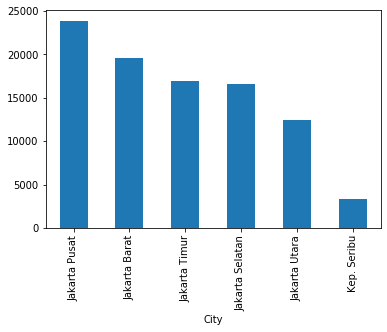

In [34]:
import matplotlib as plt
df_population.set_index('City')['Total_population_2020(people/km2)'].plot.bar()

### The chart below show the population density in Jakarta, per district.

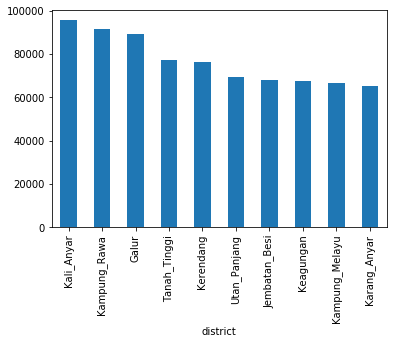

In [36]:
import matplotlib as plt
df_most_population.set_index('district')['Total_population_2020_(people/km2)'].plot.bar()

## Based on the graph results shown that areas need the distribution of masks the most is Central Jakarta (Jakarta Pusat) with the most populated areas. Then 5 districts that mostly need for a distribution of masks are Kali Anyar, Kampung Rawa, Galur, Tanah Tinggi, and Kerendang.

To better understand and estimate the territories or areas that are within the administrative government of Jakarta city, we need to plot all the districts that we have downloaded from the riwayat-file-covid-19-dki-jakarta-jakartagis.hub.arcgis.com site together with their latitude and longitude values. The following lines of Python code will execute the task using Folium API.

In [37]:
# Construct a map of all districts neighborhood in Jakarta 
map_jkt = folium.Map(location=[-6.2, 106.8], zoom_start=11)
for lat, lng, label in zip(df_cases['Latitude'], df_cases['Longitude'], df_cases['nama_kelurahan']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        location=[lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_jkt)      
map_jkt

As we can see from the above map, most of the districts are within the main outer ring roads surrounding the city, and others are situated outside the main ring roads. To solve in our business challenge, we need to show the extent and the distribution medical devices for treatment of COVID-19 positive case-patients within the city of Jakarta based on the number that we obtained from the government site. The following lines of Python code will achieve the task and present the data in a clear visual approach.

In [38]:
# Plot a map of Covid-19 distribution in the city of Jakarta per May 28, 2020
map_covid_jkt = folium.Map(location=[-6.2, 106.8], zoom_start=11)
for lat,lon,area,size in zip(df_cases['Latitude'],df_cases['Longitude'],df_cases['nama_kelurahan'],df_cases['POSITIF']):
     folium.CircleMarker(
         location=[lat, lon],
         popup=area,
         radius=size/2,
         color='r',
         opacity=0.5,
         fill=True,
         fill_opacity=0.5,
         fill_color='red',
         ).add_to(map_covid_jkt)
map_covid_jkt

his is a similar map plot that we can see from the government task force for Covid-19 cases in Jakarta. Their graph can be seen in this link: https://corona.jakarta.go.id/id/peta-persebaran. As we can see, most of the regions in Jakarta are now in the ‘RED’ zone, with the radius of the circle represent the relative extent of Covid-19 distribution in the City of Jakarta.
A better presentation of the data would be to use a ‘slider’ in the map that shows the growth of the circle day by day or simply an animation that shows the daily growth of Covid-19 cases in the city. An app developer might develop an App that alerts vehicles/road users that alerts that they are not allowed to pass the RED zone within the city. This App could save lives! The next set of problems that we need to solve is to show the location of existing and approved Covid-19 testing centers (or reference hospitals) and see how well they are distributed to each other within the city and in which regions of Jakarta. The following lines of Python code show how. We will first try to plot the hospitals WITHOUT the RED circles as that might cause distraction.

In [39]:
# Construct a map of all existing Covid-19 testing hospitals in Jakarta 
map_hosp = folium.Map(location=[-6.2, 106.8], zoom_start=11)
for lat, lng, hosp in zip(df_hospital['Latitude'], df_hospital['Longitude'], df_hospital['Hospital']):
    label = folium.Popup(hosp, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=hosp,
        icon=folium.Icon(color='blue', icon='header'),
        ).add_to(map_hosp)      
map_hosp

As you can see, the hospitals are quite sparsely distributed within each other except the two hospitals in the south are relatively close to each other (i.e. Fatmawati and Pasar Minggu hospitals). Let’s see how strategic they are in accomodating the extent of positive cases patients in the city. We can do this by overlaying the two data within a single map as shown in the following codes:

In [40]:
# Plot a combined map of Covid-19 distribution in the city of Jakarta & current available testing centers
map_covid_hosp_jkt = folium.Map(location=[-6.2, 106.8], zoom_start=11)
for lat,lon,area,size in zip(df_cases['Latitude'],df_cases['Longitude'],df_cases['nama_kelurahan'],df_cases['POSITIF']):
     folium.CircleMarker(
         location=[lat, lon],
         popup=area,
         radius=size/2,
         color='r',
         opacity=0.5,
         fill=True,
         fill_opacity=0.5,
         fill_color='red',
         ).add_to(map_covid_hosp_jkt)
# Construct a map of all existing Covid-19 testing hospitals in Jakarta 
for lat, lng, hosp in zip(df_hospital['Latitude'], df_hospital['Longitude'], df_hospital['Hospital']):
    label = folium.Popup(hosp, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=hosp,
        icon=folium.Icon(color='blue', icon='header'),
        ).add_to(map_covid_hosp_jkt)      
map_covid_hosp_jkt

## We can see from the results of the distribution of COVID-19 cases and the location of hospitals, almost all hospitals require a lot of medical equipment for COVID-19 treatment. In addition to Fatmawati hospital and the Pasar Minggu hospital, the distribution of the COVID-19 case is not as extensive as other hospitals.

## Discussion

We will try to analyze locations in the red zone based on the location of the hospital in the middle of the red zone. We determine based on the location of the Tarakan Hospital, Central Jakarta.

Let’s begin by trying to get the top 100 venues that are within Tarakan Hospital neighborhood and are within a radius of 500 meters of our candidate Covid-19 testing center using FOURSQUARE API. First, let’s create the GET request URL. Name that URL, url.

In [41]:
prop_neighborhood = pd.DataFrame({
   'Hospital':['RSUD Tarakan']
})

neighborhood_latitude_list = []   # create empty lists for latitude
neighborhood_longitude_list = []  # create empty lists for longitude

for index, row in prop_neighborhood.iterrows(): # iterate over rows in dataframe
    neigh = row['Hospital']  
    query = str(neigh) + ', Jakarta Pusat'
    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    neighborhood_latitude_list.append(lat)
    neighborhood_longitude_list.append(long)
# create new columns from lists    
prop_neighborhood['Latitude'] = neighborhood_latitude_list   
prop_neighborhood['Longitude'] = neighborhood_longitude_list
prop_neighborhood

,Hospital,Latitude,Longitude
0,RSUD Tarakan,-6.171638,106.810346


In [42]:
# Define function that extracts the category of the venue based on the returned JSON file
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [43]:
neighborhood_latitude = 0
neighborhood_longitude = 0

address = 'RSUD Tarakan, Jakarta Pusat'

geolocator = Nominatim(user_agent="Hospital_agent")
location = geolocator.geocode(address)
neighborhood_latitude= location.latitude
neighborhood_longitude= location.longitude
print("RSUD Tarakan: ", neighborhood_latitude, ",",neighborhood_longitude)


RSUD Tarakan:  -6.1723055 , 106.8106017


In [44]:
# Get url for the API in Tarakan Hospital neighborhood
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius in meter
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
# url - not printed for privacy

Next, let’s make a request using REQUEST library, and name our query results for Tarakan Hospital area, results.

In [45]:
# Send the GET request and examine the resutls
results = requests.get(url).json()
# results - not printed for shortening of the report

Next, we will use the above function (get_category_type) to extract information from the JSON file related to venues in the Tarakan Hospital neighborhood. The following line of code should do the trick:

In [46]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues

C:\Users\cahya\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Warung Nasi Bunda,Indonesian Restaurant,-6.171549,106.808877
1,Kopi Kebut Nitro Bar,Coffee Shop,-6.173219,106.811754
2,McDonald's Cideng,Fast Food Restaurant,-6.173391,106.811314
3,Bubur Ayam Musi,Breakfast Spot,-6.174420,106.809554
4,Starbucks,Coffee Shop,-6.175441,106.812220
5,Petrof Piano,Music Venue,-6.172733,106.811713
6,Pondok Aroma Laut,Seafood Restaurant,-6.171484,106.808930
7,Suan Thai,Thai Restaurant,-6.173744,106.811701
8,favehotel Tanah Abang - Cideng,Hotel,-6.173586,106.811802
9,Focus Nusantara - Camera & Photography Shop,Camera Store,-6.175639,106.812901


In [47]:
df_vanue = nearby_venues
df_vanue

,name,categories,lat,lng
0,Warung Nasi Bunda,Indonesian Restaurant,-6.171549,106.808877
1,Kopi Kebut Nitro Bar,Coffee Shop,-6.173219,106.811754
2,McDonald's Cideng,Fast Food Restaurant,-6.173391,106.811314
3,Bubur Ayam Musi,Breakfast Spot,-6.174420,106.809554
4,Starbucks,Coffee Shop,-6.175441,106.812220
5,Petrof Piano,Music Venue,-6.172733,106.811713
6,Pondok Aroma Laut,Seafood Restaurant,-6.171484,106.808930
7,Suan Thai,Thai Restaurant,-6.173744,106.811701
8,favehotel Tanah Abang - Cideng,Hotel,-6.173586,106.811802
9,Focus Nusantara - Camera & Photography Shop,Camera Store,-6.175639,106.812901


In [48]:
FID_value2 = []
n2 = 0
for index, row in df_vanue.iterrows():
    #FID = row['FID']
    n2 = n2 + 1
    fid2 = n2
    FID_value2.append(fid2)
print(FID_value2)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [49]:
df_vanue.insert(0,"FID",FID_value2)
df_vanue

,FID,name,categories,lat,lng
0,1,Warung Nasi Bunda,Indonesian Restaurant,-6.171549,106.808877
1,2,Kopi Kebut Nitro Bar,Coffee Shop,-6.173219,106.811754
2,3,McDonald's Cideng,Fast Food Restaurant,-6.173391,106.811314
3,4,Bubur Ayam Musi,Breakfast Spot,-6.174420,106.809554
4,5,Starbucks,Coffee Shop,-6.175441,106.812220
5,6,Petrof Piano,Music Venue,-6.172733,106.811713
6,7,Pondok Aroma Laut,Seafood Restaurant,-6.171484,106.808930
7,8,Suan Thai,Thai Restaurant,-6.173744,106.811701
8,9,favehotel Tanah Abang - Cideng,Hotel,-6.173586,106.811802
9,10,Focus Nusantara - Camera & Photography Shop,Camera Store,-6.175639,106.812901


In [50]:
df_vanue.to_csv('vanues.csv',index=False)

In [51]:
# Check how many venues were returned by Foursquare?
print('{} venues were returned by Foursquare for {} neighborhood.'.format(nearby_venues.shape[0], prop_neighborhood.iloc[0,0]))

29 venues were returned by Foursquare for RSUD Tarakan neighborhood.


Based on the results generated by the FOURSQUARE API, we can locate the business site around Tarakan hospital and identify affected business locations in the red zone.

In [52]:
# Sort venues around Tarakan Hospital area
df_tarakan_neigh = nearby_venues.groupby('categories').count()
df_tarakan_neigh.drop(columns =['lat', 'lng', 'FID'], inplace=True)
df_tarakan_neigh.sort_values(by='name', ascending=False, inplace=True)
df_tarakan_neigh1 = df_tarakan_neigh.iloc[0:14]
df_tarakan_neigh2 = df_tarakan_neigh.iloc[14:]
df_tarakan_neigh1.reset_index()

,categories,name
0,Indonesian Restaurant,7
1,Coffee Shop,3
2,Fast Food Restaurant,3
3,Hotel,3
4,Asian Restaurant,2
5,Camera Store,2
6,American Restaurant,1
7,Bookstore,1
8,Breakfast Spot,1
9,Convenience Store,1


The next set of challenges that we need to tackle is to gain slightly more insights (profile) of the Tarakan hospital area. To simplify our analysis, we will just use the Euclidian (distance-based) clustering technique which is part of the unsupervised machine learning technique. In particular, we will use K-means clustering.

To start, we need to decide the best K-value for our analysis. We will let the K-means clustering algorithm to calculate this for us. The following lines of code will carry out the task.

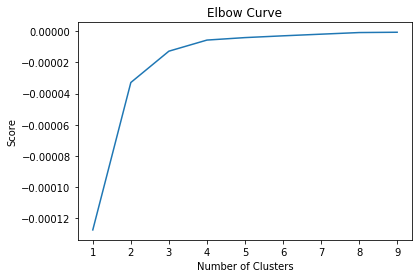

In [53]:
import matplotlib.pyplot as plt

# Apply unsupervised Machine Learning clustering technique to the neighborhood data in Tarakan Hospital
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = nearby_venues[['lat']]
X_axis = nearby_venues[['lng']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

The X-axis of the plot shows various number of K-values that we can use for our clustering analysis. As we can see from the chart, the curve starts flattening out at K=3. Therefore, we will use a K=3 to cluster neighborhoods surrounding our proposed Covid-19 testing center. The following lines of code assign Cluster label to all venues that are within a 500-meter radius of our Covid-19 testing center in Tarakan Hospital area:

In [54]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(nearby_venues[nearby_venues.columns[3:4]]) # Compute k-means clustering.
nearby_venues['cluster_label'] = kmeans.fit_predict(nearby_venues[nearby_venues.columns[3:4]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(nearby_venues[nearby_venues.columns[3:4]]) # Labels of each point
nearby_venues

,FID,name,categories,lat,lng,cluster_label
0,1,Warung Nasi Bunda,Indonesian Restaurant,-6.171549,106.808877,2
1,2,Kopi Kebut Nitro Bar,Coffee Shop,-6.173219,106.811754,0
2,3,McDonald's Cideng,Fast Food Restaurant,-6.173391,106.811314,0
3,4,Bubur Ayam Musi,Breakfast Spot,-6.174420,106.809554,0
4,5,Starbucks,Coffee Shop,-6.175441,106.812220,1
5,6,Petrof Piano,Music Venue,-6.172733,106.811713,0
6,7,Pondok Aroma Laut,Seafood Restaurant,-6.171484,106.808930,2
7,8,Suan Thai,Thai Restaurant,-6.173744,106.811701,0
8,9,favehotel Tanah Abang - Cideng,Hotel,-6.173586,106.811802,0
9,10,Focus Nusantara - Camera & Photography Shop,Camera Store,-6.175639,106.812901,1


In [55]:
# Check whether all the cluster labels exist in the data
list(nearby_venues['cluster_label'].unique())
[0, 2, 1]

[0, 2, 1]

To better visualize the clustering of our neighborhood, we will need to create a custom function that we call ‘regioncolors’ that will assign a color to each area within a 500-meter radius of our proposed facility. The following line of code should help us with this task.

In [56]:
def regioncolors(counter):
    if counter['cluster_label'] == 0:
        return 'green'
    elif counter['cluster_label'] == 1:
        return 'blue'
    elif counter['cluster_label'] == 2:
        return 'red'
    else:
        return 'error'

nearby_venues["color"] = nearby_venues.apply(regioncolors, axis=1)
nearby_venues

,FID,name,categories,lat,lng,cluster_label,color
0,1,Warung Nasi Bunda,Indonesian Restaurant,-6.171549,106.808877,2,red
1,2,Kopi Kebut Nitro Bar,Coffee Shop,-6.173219,106.811754,0,green
2,3,McDonald's Cideng,Fast Food Restaurant,-6.173391,106.811314,0,green
3,4,Bubur Ayam Musi,Breakfast Spot,-6.174420,106.809554,0,green
4,5,Starbucks,Coffee Shop,-6.175441,106.812220,1,blue
5,6,Petrof Piano,Music Venue,-6.172733,106.811713,0,green
6,7,Pondok Aroma Laut,Seafood Restaurant,-6.171484,106.808930,2,red
7,8,Suan Thai,Thai Restaurant,-6.173744,106.811701,0,green
8,9,favehotel Tanah Abang - Cideng,Hotel,-6.173586,106.811802,0,green
9,10,Focus Nusantara - Camera & Photography Shop,Camera Store,-6.175639,106.812901,1,blue


At this stage, we have assigned cluster labels to all of our neighborhood venues, and we have assigned unique colors to each cluster. Next, we can then visualize our clustering analysis to a Folium map to see how all of these venues are geographically distributed within the 500-meter radius that we specified surrounding the proposed facility.

In [57]:
# Construct a map of neighborhood venues in Tarakan Hospital, Cetral Jakarta 
map_Tarakan = folium.Map(location=[-6.17163765, 106.81034620548138], zoom_start=16)
for lat, lng, cat, col in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['categories'], nearby_venues['color']):
    label = folium.Popup(cat, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=cat,
        icon=folium.Icon(color=col),
        ).add_to(map_Tarakan)      
for lat, lng, neigh in zip(prop_neighborhood['Latitude'], prop_neighborhood['Longitude'], prop_neighborhood['Hospital']):
    label = folium.Popup(neigh, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=neigh,
        icon=folium.Icon(color='darkblue', icon='header'),
        ).add_to(map_Tarakan)
    
map_Tarakan

Then we compiled a map of the results of this business location with a map of the distribution of COVID-19 cases.

In [59]:
# Construct a map of neighborhood venues in Tarakan Hospital, Cetral Jakarta 
map_Redzone = folium.Map(location=[-6.17163765, 106.81034620548138], zoom_start=16)
for lat, lng, cat, col in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['categories'], nearby_venues['color']):
    label = folium.Popup(cat, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=cat,
        icon=folium.Icon(color=col),
        ).add_to(map_Redzone)      
for lat, lng, neigh in zip(prop_neighborhood['Latitude'], prop_neighborhood['Longitude'], prop_neighborhood['Hospital']):
    label = folium.Popup(neigh, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=neigh,
        icon=folium.Icon(color='darkblue', icon='header'),
        ).add_to(map_Redzone)
for lat,lon,area,size in zip(df_cases['Latitude'],df_cases['Longitude'],df_cases['nama_kelurahan'],df_cases['POSITIF']):
     folium.CircleMarker(
         location=[lat, lon],
         popup=area,
         radius=size/2,
         color='r',
         opacity=0.5,
         fill=True,
         fill_opacity=0.5,
         fill_color='red',
         ).add_to(map_Redzone)
    
map_Redzone

## The result of analysis is the location of the business which is in the Tarakan hospital neighborhood and is within a radius of 500 meters. Then, we also get the most congested cluster if businesses apply normal conditions in the red zone, potentially increasing cases of contracting the COVID-19 virus within the area.

# Results and Discussion

The project aims to provide information to local people who must be alerted to go out of the house from the distribution of the COVID-19 case in Jakarta. It also aims to provide information on areas that are most needed for a lot of mask distribution, according to population density in the area.

Further, it provides information on which hospitals that need the most medical equipments for COVID-19 treatment, possibly even additional medical personnels (doctors and nurses). It also provides information on the business neighborhood which shall implement Covid-19 health protocol with a high discipline when “new normal” comes.

# Conclusion

This project helps mask sellers to understand potential distribution areas according to population density in Jakarta. It also helps the distribution of medical devices for corona care to hospitals that are estimated to have a large number of patients or even helps analyzing which hospitals need additional medical personnel (doctors and nurses).
It will also provide awareness to help business owners who run businesses surrounding the adjacent clusters to be better informed, with the density of people within the business neighborhood.